In [2]:
import numpy as np 
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf
from tqdm import tqdm


In [3]:
import os
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir("../input"))

['celeba-dataset']


In [4]:
path_celeb = []
train_path_celeb = "/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/"
for path in os.listdir(train_path_celeb):
    if '.jpg' in path:
        path_celeb.append(os.path.join(train_path_celeb, path))

In [5]:
new_path=path_celeb[0:50000]


In [6]:
len(new_path)

50000

In [7]:
crop = (30, 55, 150, 175)
images = [np.array((Image.open(path).crop(crop)).resize((64,64))) for path in new_path]

for i in tqdm(range(len(images))):
    images[i] = images[i].astype('float32')/255
    
images = np.array(images) 

100%|██████████| 50000/50000 [00:01<00:00, 33654.45it/s]


In [8]:
train_data=images

In [9]:
len(path_celeb)

202599

In [10]:
print(train_data.shape)

(50000, 64, 64, 3)


# **Data Visualization**

<Figure size 720x720 with 0 Axes>

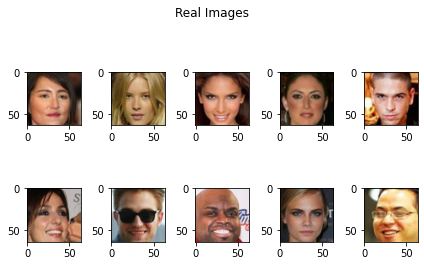

In [11]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=800

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(train_data[idx].reshape(64,64,3))
            idx+=600
            
plt.tight_layout()
plt.show()

In [12]:
X_train = train_data

# **Generator**

In [13]:
noise_shape = 100

In [14]:
generator=Sequential()
generator.add(Dense(4*4*512,input_shape=[noise_shape]))
generator.add(Reshape([4,4,512]))
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid'))

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         2097408   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       524416    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0

# **Discriminator**

In [16]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[64,64, 3]))
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [17]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         131200    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 128)        

# **DCGAN (combined model)**

In [18]:
GAN =Sequential([generator,discriminator])

In [19]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [20]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [21]:
GAN.layers

In [22]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 64, 64, 3)         3585219   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 695009    
Total params: 4,280,228
Trainable params: 3,584,323
Non-trainable params: 695,905
_________________________________________________________________


# **Training**

In [29]:
epochs = 100
batch_size = 150

In [30]:
D_loss=[]
G_loss=[]

Currently on Epoch 1
	Currently on batch number 0 of 333
	Currently on batch number 100 of 333
	Currently on batch number 200 of 333
	Currently on batch number 300 of 333


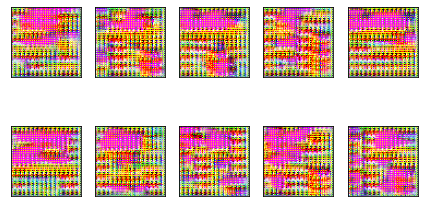

Epoch: 1,  Loss: D_real = 0.000, D_fake = 0.000,  G = 0.000
Currently on Epoch 2
	Currently on batch number 0 of 333
	Currently on batch number 100 of 333
	Currently on batch number 200 of 333
	Currently on batch number 300 of 333
Epoch: 2,  Loss: D_real = 0.000, D_fake = 0.000,  G = 0.000
Currently on Epoch 3
	Currently on batch number 0 of 333
	Currently on batch number 100 of 333
	Currently on batch number 200 of 333
	Currently on batch number 300 of 333
Epoch: 3,  Loss: D_real = 0.000, D_fake = 0.000,  G = 0.000
Currently on Epoch 4
	Currently on batch number 0 of 333


In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    # For every batch in the dataset
    for i in range(X_train.shape[0]//batch_size):
        
        if (i)%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(X_train)//batch_size}")
            
        noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
        
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
        #train on real image
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss1 = discriminator.train_on_batch(train_dataset,train_label)
        
        #train on fake image
        train_label=np.zeros(shape=(batch_size,1))
        d_loss2 = discriminator.train_on_batch(gen_image,train_label)
        
        
        noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        #train the generator
        g_loss = GAN.train_on_batch(noise, train_label)
        D_loss.append(d_loss1+d_loss2)
        G_loss.append(g_loss)
        
         
    if epoch % 5 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples,100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(64,64,3))
            plt.xticks([])
            plt.yticks([])

        
        plt.tight_layout()
        plt.show()
    print('Epoch: %d,  Loss: D_real = %.3f, D_fake = %.3f,  G = %.3f' %   (epoch+1, d_loss1, d_loss2, g_loss))        
print('Training is complete')

# **Output Visualization**

In [ ]:
noise=np.random.uniform(-1,1,size=[500,noise_shape])

In [ ]:
im=generator.predict(noise)

In [ ]:
for i in range(5):
 plt.figure(figsize=(7,7))   
 for k in range(20):
            noise=np.random.uniform(-1,1,size=[100,noise_shape])
            im=generator.predict(noise) 
            plt.subplot(5, 4, k+1)
            plt.imshow(im[k].reshape(64,64,3))
            plt.xticks([])
            plt.yticks([])
 
 plt.tight_layout()
 plt.show()

# **Loss Curve**

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(G_loss,color='red',label='Generator_loss')
plt.plot(D_loss,color='blue',label='Discriminator_loss')
plt.legend()
plt.xlabel('total batches')
plt.ylabel('loss')
plt.title('Model loss per batch')
plt.show()

In [ ]:
import pickle
Pkl_Filename = "DCGAN.pkl"  

# **Reference**

1. https://medium.com/coloredfeather/generating-human-faces-using-adversarial-network-960863bc1deb blog post
2. https://arxiv.org/abs/1511.06434  paper on DCGANS published in 2016
